<a id = '4.0'></a>
<p style = "font-size : 35px; color : #34656d ;  text-align : center; background-color : #08f9f9; border-radius: 5px 5px;"><strong>Multi-Class Logistic Regression (Iris)</strong></p> 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('iris.csv')  # iris datamız var, iris denen bir çiçek. taç yaprakları var. hangi çeşit?

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100,3.500,1.400,0.200,setosa
1,4.900,3.000,1.400,0.200,setosa
2,4.700,3.200,1.300,0.200,setosa
3,4.600,3.100,1.500,0.200,setosa
4,5.000,3.600,1.400,0.200,setosa


## Exploratory Data Analysis and Visualization

In [4]:
df.info()   # taç yaprak, çanak yaprak. # toplam 150 datamız var, çok az.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe().T   

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.000,5.843,0.828,4.300,5.100,5.800,6.400,7.900
sepal_width,150.000,3.054,0.434,2.000,2.800,3.000,3.300,4.400
petal_length,150.000,3.759,1.764,1.000,1.600,4.350,5.100,6.900
petal_width,150.000,1.199,0.763,0.100,0.300,1.300,1.800,2.500


In [6]:
df['species'].value_counts()  # üç çeşit var. hepsinden 50şer tane

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

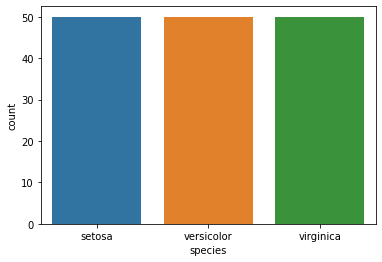

In [7]:
sns.countplot(df['species']);   

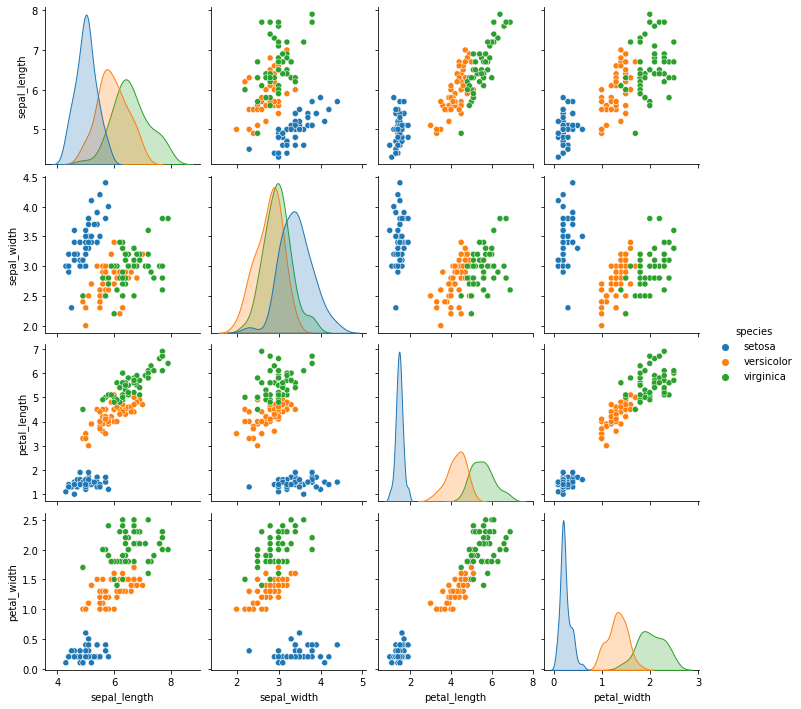

In [8]:
sns.pairplot(df,hue='species');  
# kolay ayrılabilir bir data olduğu görülüyor.
# burada biz multiclass örneği görmeye çalışıyoruz sadece

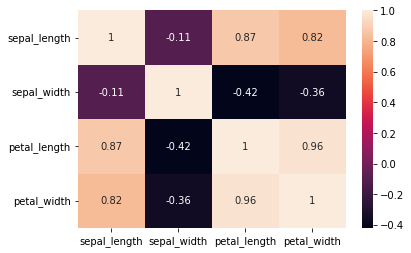

In [9]:
sns.heatmap(df.corr(),annot=True);   
# multicolllinerity var. petal length ile petal width arasında
# log reg de penalty parametresi var, onunla multicolinerity ile overfitting ile mücadele ediyor.

## Train | Test Split and Scaling

In [10]:
X = df.drop('species',axis=1)
y = df['species']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [13]:
scaler = StandardScaler()

In [14]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling and Model Performance

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

### With Default Parameters

In [16]:
log_model = LogisticRegression()

In [17]:
log_model.fit(X_train_scaled,y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred

# sadece targetta kategorik veriler varsa çalışıyor. problem yok. nümerik yapmaya gerek yok.
# ama featurellarda kategorik olmayacak. varsa one hot encoding yapılmalı. rakalmlara çevrilmeli.
# predict ettiği değerler aşağıda.

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

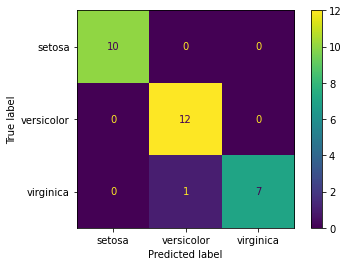

In [18]:
plot_confusion_matrix(log_model, X_test_scaled, y_test)

# binary ye göre cm ne oldu? 3 feature old.dan 3 e 3 oldu

In [19]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [20]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

# target şu diyemiyorum. 3 sınıf var. bunlar için sonuçlar üretiyor. precision, recall, accuracy bakıyor

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


Train_Set
[[40  0  0]
 [ 0 35  3]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.92      0.95        38
   virginica       0.93      0.98      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



### Cross Validate

In [21]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()   # modeli tekrar tanımlıyoruz.karışmasın diye. sıfırdan.

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)  # ortalamalarını verecek şekilde görmek istiyoruz
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]   # ortalamasını yazdırıyoruz.
# cross validation da böyle. weighted ları kullanıyoruz sadece tek farkı bu oldu

test_accuracy             0.950
test_precision_weighted   0.960
test_recall_weighted      0.950
test_f1_weighted          0.949
dtype: float64

### Cross Validate for versicolor

In [22]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_versicolor = make_scorer(f1_score, average = None, labels =["versicolor"])
precision_versicolor = make_scorer(precision_score, average = None, labels =["versicolor"])
recall_versicolor = make_scorer(recall_score, average = None, labels =["versicolor"])

# sadece versicolor için yaptırıyoruz

In [23]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = {"f1_versicolor":f1_versicolor, 
                                                                   "precision_versicolor":precision_versicolor,
                                                                   "recall_versicolor":recall_versicolor}, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# çok büyük datalarda büyük değişikliklere sebebiyet vermez. data sayısı çok az olursa büyük değişimlere neden olabilir.
# gerçek dünyada en az 4-5 bin. 100 bin - 200 bin data ile uğraşıyoruz.

test_f1_versicolor          0.924
test_precision_versicolor   0.940
test_recall_versicolor      0.925
dtype: float64

## Class prediction

In [24]:
y_pred=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_setosa"] = y_pred_proba[:,0]
test_data["pred_proba_versicolar"] = y_pred_proba[:,1]
test_data["pred_proba_virginica"] = y_pred_proba[:,2]
test_data.sample(10)

# class prediction da her birinin probalarını görebiliriz. hangisi yüksekse o pred e assign ediliyor

,sepal_length,sepal_width,petal_length,petal_width,species,pred,pred_proba_setosa,pred_proba_versicolar,pred_proba_virginica
147,6.500,3.000,5.200,2.000,virginica,virginica,0.001,0.161,0.838
53,5.500,2.300,4.000,1.300,versicolor,versicolor,0.008,0.886,0.105
43,5.000,3.500,1.600,0.600,setosa,setosa,0.974,0.026,0.000
127,6.100,3.000,4.900,1.800,virginica,virginica,0.006,0.390,0.604
146,6.300,2.500,5.000,1.900,virginica,virginica,0.000,0.188,0.812
129,7.200,3.000,5.800,1.600,virginica,virginica,0.000,0.354,0.646
123,6.300,2.700,4.900,1.800,virginica,virginica,0.001,0.329,0.670
42,4.400,3.200,1.300,0.200,setosa,setosa,0.985,0.015,0.000
31,5.400,3.400,1.500,0.400,setosa,setosa,0.942,0.058,0.000
33,5.500,4.200,1.400,0.200,setosa,setosa,0.998,0.002,0.000


### With Best Parameters (GridsearchCV)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [25]:
log_model = LogisticRegression(max_iter=5000)   # grid search te hyperparametreleri ayarlayacağız

In [26]:
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)

param_grid = {"penalty" : penalty,
             "C" : C}

In [27]:
grid_model = GridSearchCV(log_model, param_grid = param_grid, cv=5) 
#scoring = f1_setosa = make_scorer(f1_score, average = None, labels =["setosa"]) 
#  modeli her seferinde yeniden oluşturmakta fayda var

In [28]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [29]:
grid_model.best_params_ # default accuracy score

{'C': 16.23776739188721, 'penalty': 'l2'}

In [30]:
grid_model.best_score_

0.9666666666666668

In [31]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

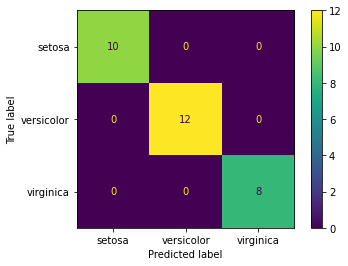

In [32]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)

# bir tane bir vardı. hatalı bir şey. hyperparametre tuning ile o da gitmiş oldu. performansı daha iyi hale gelmiş oldu.

In [33]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

# genelde test train den düük olur. burada yüksek ama sizi yanlış yönlendirmesin data sayısı düşük

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Train_Set
[[40  0  0]
 [ 0 37  1]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.97      0.97        38
   virginica       0.98      0.98      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [34]:
from sklearn.metrics import plot_roc_curve

In [36]:
# plot_roc_curve(grid_model, X_test_scaled, y_test);  # roc binary de kullanılabilir, multiclss ta kullanılamaz

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [ ]:
# import sys
# sys.path.append("/usr/local/lib/python3.9/site-packages")


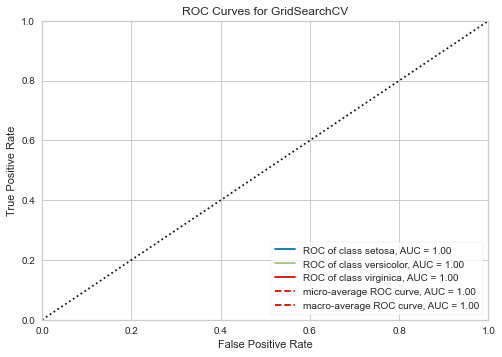

In [37]:
from yellowbrick.classifier import ROCAUC
model = grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();               

# roc kullanılması için, çözüm yolları üretilmiş. bu da bunlardan bir tanesi. çok elzemse kullanılır.

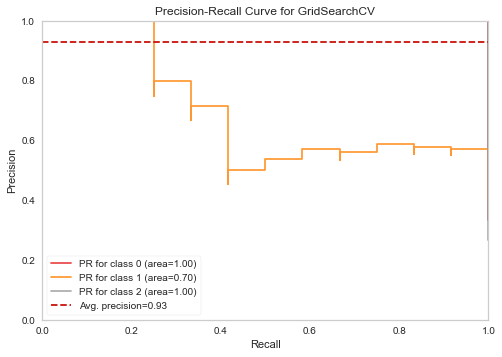

In [38]:
from yellowbrick.classifier import PrecisionRecallCurve

model = grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_scaled, y_train)
viz.score(X_test_scaled, y_test)
viz.show();

In [39]:
# sınıflar ne kadar ayrılabilirse, roc curve o kadar daha iyi. auc o zaman bire yaklaşıyor. tam ayırdığında 1 oluyor.
# thresholdlar ile roc çiziliyor.
# precision recall u biz genelde imbalance ta tercih ediyoruz. recall da da aslında iyi ayırırsa o da 1 e dogğru gidiyor. 
# normal bir datada roc bizim işimizi görüyor. ama imbalance bir datada precision recall da bunu daha net görüyoruz.
# (paulvanderlaken.com da görseli var)

## Final Model and Model Deployment

In [40]:
# bütün işlemlerimiz bitti. ne yaptık? 
# sıra ile x y yi belirledik, train split yaptık, scaling yaptık, modelimizi kurduk, fit yaptık, prediction yaptık,
# predict proba ile olasılıklarını bulduk işlerimiz biti. sonra bunu ne yapmamız lazım. evaluate
# evaluate: sınıflamada confusion matrix ile classification report. orada bize recalları, precisionları, f1leri söyledi. 
# cv yaptık gerçek performanslar için. grid search ile de metriği belirliyorum. recall için mesela hyprparametreleri istyorum.
# sonra ben o hyperparametreyi kullanarak, final modelimi oluşturuyorum. -->deployment --> product.

In [41]:
scaler = StandardScaler().fit(X)   # burada bütün datayı kullanıyorum. kalıbını çıkartıyorum. 

In [42]:
import pickle
pickle.dump(scaler, open("scaler_iris", 'wb'))   # pickle ile scaler iris isimli bir dosya olarak saklıyorum

In [43]:
X_scaled = scaler.transform(X)   # scaler ile bunu transform ediyorum, dönüştürüyorum

In [44]:
final_model = LogisticRegression(C=16.23, penalty="l2").fit(X_scaled, y)  # bu ölçeklenmiş data ile ben modelimi eğitiyorum

In [45]:
pickle.dump(final_model, open("final_model_iris", 'wb'))  # şimdi nbunu final model iris diye tekrar dump ediyorum

In [46]:
# modelim artıkoluştu ve klasörümde var. son kullanıcıdan data istiyoruz.

# Using the Model

In [47]:
X.describe().T  # min max değerlerine dikkat etmek lazım

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.000,5.843,0.828,4.300,5.100,5.800,6.400,7.900
sepal_width,150.000,3.054,0.434,2.000,2.800,3.000,3.300,4.400
petal_length,150.000,3.759,1.764,1.000,1.600,4.350,5.100,6.900
petal_width,150.000,1.199,0.763,0.100,0.300,1.300,1.800,2.500


In [48]:
my_dict = {"sepal_length": [4.5, 5.8, 7.5],
           "sepal_width": [2.2, 3, 4.2],
           "petal_length": [1.3, 4.3, 6.5],
           "petal_width": [0.2, 1.3, 2.3]
          }    
# 4 tane observaiton verilmiş

In [49]:
sample = pd.DataFrame(my_dict)   # df e ceviriyoruz
sample

,sepal_length,sepal_width,petal_length,petal_width
0,4.500,2.200,1.300,0.200
1,5.800,3.000,4.300,1.300
2,7.500,4.200,6.500,2.300


In [50]:
scaler_iris = pickle.load(open("scaler_iris", "rb"))    # rb olarak açıp load ediyorum

In [51]:
sample_scaled = scaler_iris.transform(sample)     # sample datamı transform ettim. fit etmiyorum.
sample_scaled

array([[-1.62768839, -1.97618132, -1.39813811, -1.31297673],
       [-0.05250608, -0.1249576 ,  0.30783301,  0.13322594],
       [ 2.00734772,  2.65187798,  1.5588785 ,  1.44795564]])

In [52]:
final_model = pickle.load(open("final_model_iris", "rb"))    # modelimi de load ediyoruım

In [53]:
predictions = final_model.predict(sample_scaled)              # predictleri görmek istiyorum
predictions_proba = final_model.predict_proba(sample_scaled)  # predict probaları görmek istiyorum

In [54]:
sample["pred"] = predictions
sample["pred_proba_setosa"] = predictions_proba[:,0]
sample["pred_proba_versicolor"] = predictions_proba[:,1]
sample["pred_proba_virginica"] = predictions_proba[:,2]
sample

# sonraqsında bunları bir df e yazdırıyorum

,sepal_length,sepal_width,petal_length,petal_width,pred,pred_proba_setosa,pred_proba_versicolor,pred_proba_virginica
0,4.500,2.200,1.300,0.200,setosa,0.905,0.095,0.000
1,5.800,3.000,4.300,1.300,versicolor,0.004,0.993,0.003
2,7.500,4.200,6.500,2.300,virginica,0.000,0.001,0.999


In [55]:
# böylelikle logistic regression bitti

In [56]:
# sonuç itibaryla, log reg de bir sınıflama yapmış olduk. 
# binary sınıflama yaptık iki uygulmada, son uygulamada multiclass yaptık.
# metrikler belirli precision, recall, f1 score.

In [57]:
# knn de distance tabanlı bir sınıflama yöntemi. yine aynı metrkleri kullanacaksınız. 
# modelin iç yapısı  biraz farklı. knn hem sınıflamada hem reg de kullanılır. log rec sadece sınıflamada kullanılır.